In [8]:
import pandas as pd
import phate
import scprep
import scanpy as sc
import numpy as np
# matplotlib settings for Jupyter notebooks only
%matplotlib inline
DATA_PATH = '/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/sea_ad/data/'

In [2]:
adata = sc.read_h5ad(DATA_PATH + 'SEAAD_MTG_RNAseq_subset_2000cellsperbraak_PREPROCESSED.h5ad')

In [4]:
phate_operator = phate.PHATE()
Y_phate = phate_operator.fit_transform(adata[:, adata.var['highly_variable']])

Calculating PHATE...
  Running PHATE on 14000 observations and 3515 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 10.78 seconds.
    Calculating KNN search...
    Calculated KNN search in 31.05 seconds.
    Calculating affinities...
    Calculated affinities in 0.45 seconds.
  Calculated graph and diffusion operator in 42.40 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 2.63 seconds.
    Calculating KMeans...
    Calculated KMeans in 11.29 seconds.
  Calculated landmark operator in 15.06 seconds.
  Calculating optimal t...
    Automatically selected t = 20
  Calculated optimal t in 5.72 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.91 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 8.52 seconds.
Calculated PHATE in 75.24 seconds.


<Axes: xlabel='PHATE 1', ylabel='PHATE 2'>

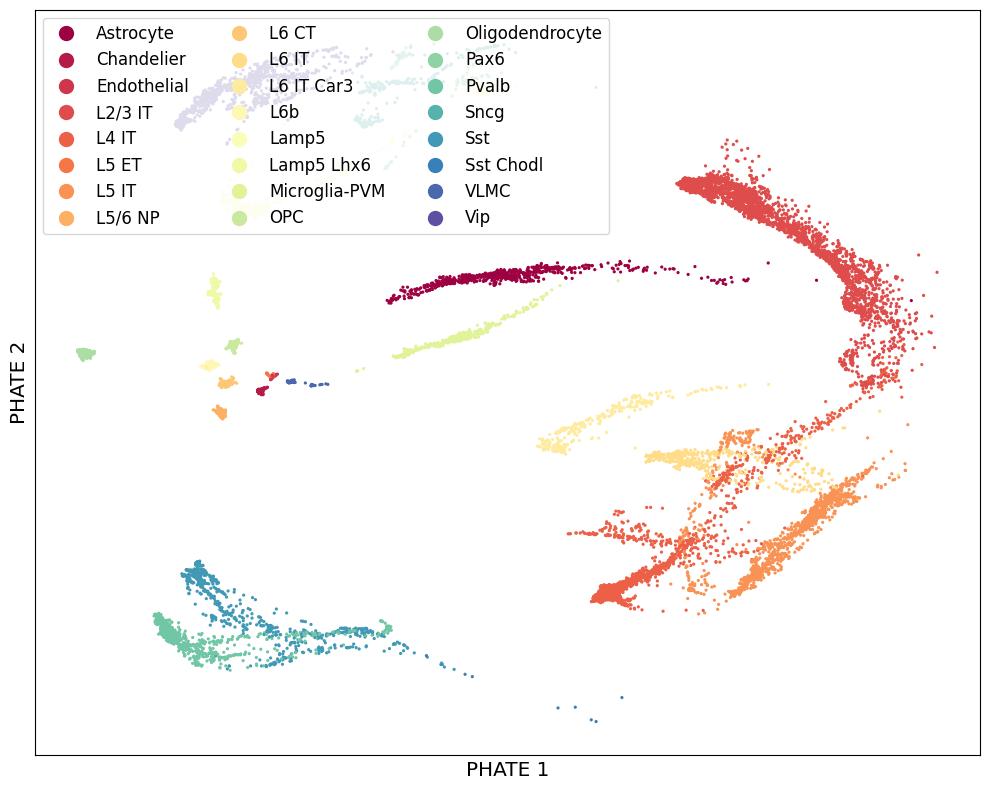

In [6]:
scprep.plot.scatter2d(Y_phate, figsize=(10,8),c=adata.obs['Subclass'], cmap='Spectral',
                      ticks=False, label_prefix="PHATE ")

In [10]:
pca_loadings = phate_operator.graph.data_nu
pca_components = phate_operator.graph.data_pca.components_

In [15]:
adata.obs['Subclass']

exp_component_name
GGGATGATCTGCCCTA-L8TX_210325_01_H08-1142430397    Oligodendrocyte
TCGTCCAGTGACTCTA-L8TX_201016_01_F05-1142430225            L2/3 IT
TCATGAGTCTGCTCTG-L8TX_210513_01_B11-1142430447            L2/3 IT
GTACTTAAGGCAACAA-L8XR_210812_01_F11-1124987484            L2/3 IT
ACTTAGGGTATCGTTG-L8TX_210825_01_H11-1142430455                Sst
                                                       ...       
GCACATAGTCGAGATG-L8TX_210506_01_G08-1142430427            L2/3 IT
TGCTGAACACTTCTCG-L8TX_210318_01_D04-1142430386                Vip
TGAACGTAGTTCCGGC-L8TX_210318_01_D04-1142430386               Sncg
CAGGTTTAGGCTGTGC-L8XR_211007_02_G03-1135704088               Sncg
CGGGACTAGCTTCATG-L8TX_210506_01_G08-1142430427         Chandelier
Name: Subclass, Length: 14000, dtype: category
Categories (24, object): ['Lamp5 Lhx6', 'Lamp5', 'Pax6', 'Sncg', ..., 'Oligodendrocyte', 'Endothelial', 'VLMC', 'Microglia-PVM']

In [9]:
np.save("../data/sea_ad_rnaseq_phate.npy", Y_phate)

In [12]:
np.save("../data/sea_ad_rnaseq_pca.npy", pca_loadings)

In [14]:
np.save("../data/sea_ad_rnaseq_pca_components.npy", pca_components)

In [17]:
adata.obs['Subclass'].to_csv("../data/sea_ad_rnaseq_celltypes.csv")